# BANK MARKETING PREDICTION

# IMPORT THE IMPORTANT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.IMPORT THE TRAIN  DATASET

In [2]:
df=pd.read_csv('termdeposit_train.csv')

# 2.DISPALY TOP 5 ROWS OF THE DATASET

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# 2.DISPLAY LAST FIVE ROWS OF DATASET

In [4]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


# 3.DISPLAY NUMBER OF ROWS AND COLUMNS

In [10]:
print('The number of rows are...',df.shape[0])
print('The number of columns are...',df.shape[1])

The number of rows are... 31647
The number of columns are... 18


# 4.DISPLAY NULL NULL VALUES

In [11]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

there is not any  NULL value present in out data set 

# 5. DISPLAY OVERALL INFORMATION OF OUR DATASET

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


### most of the columns present in our dataset has the datatype object , so we need to convert catagorical fields into numerical before creating the prediction model

# 6.DATA VISTUALIZATION

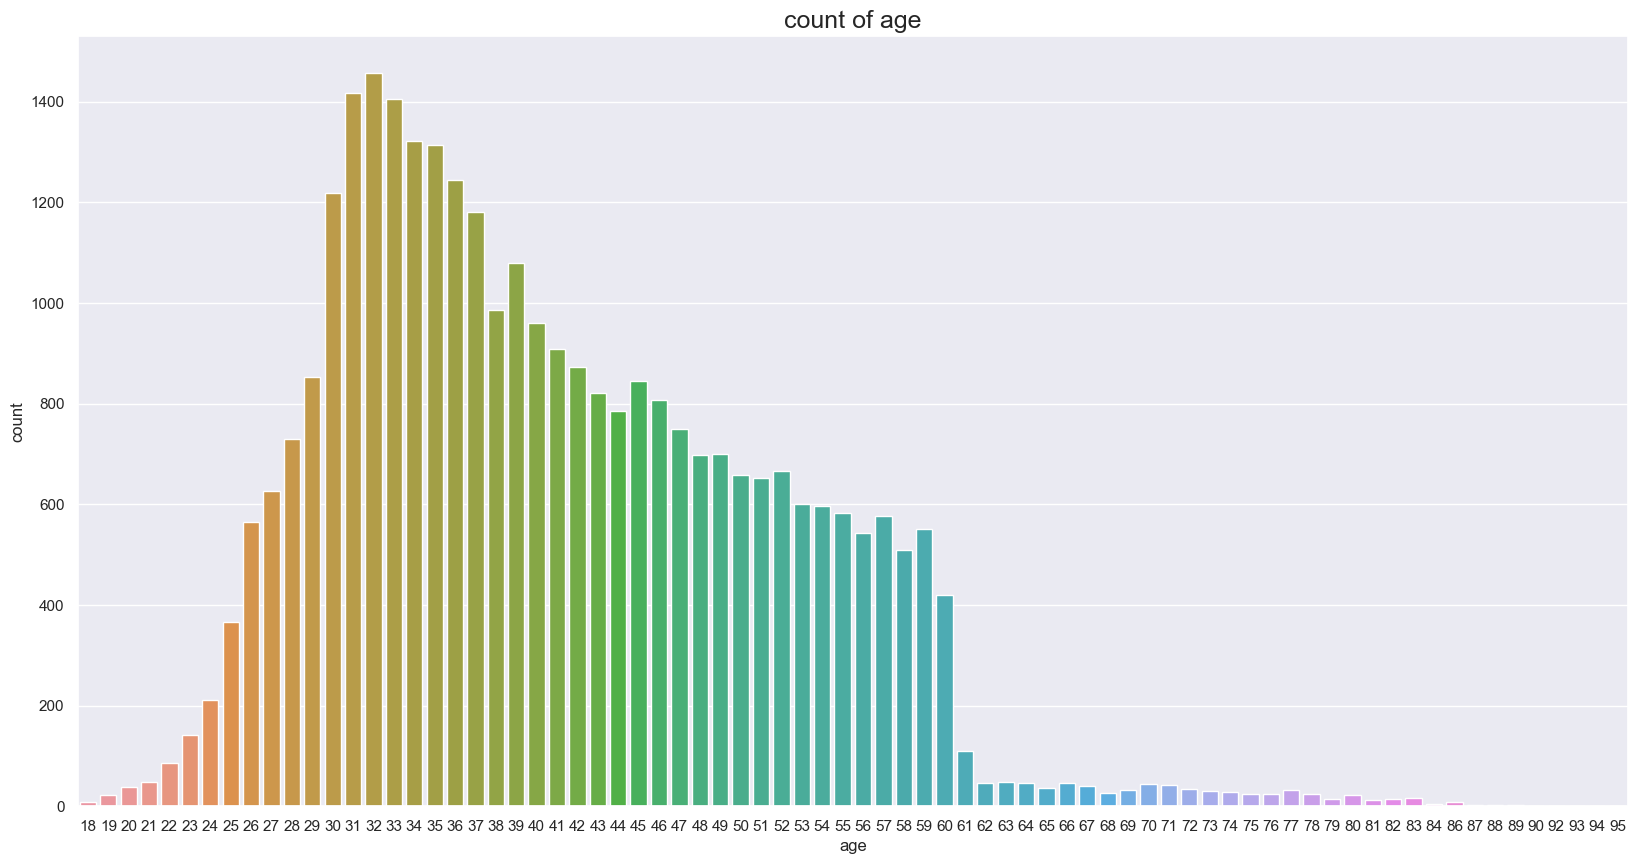

In [13]:
#count plot of age column
plt.figure(figsize=(20,10))
sns.set()

sns.countplot(x='age',data=df)
plt.title('count of age',fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))

plotnumber=1
for i in df.columns:
    if plotnumber<=18:
        plt.subplot(6,3,plotnumber)
        sns.countplot(x=i,data=df)
        plt.title(i)
    plotnumber+=1

plt.tight_layout()
plt.show()

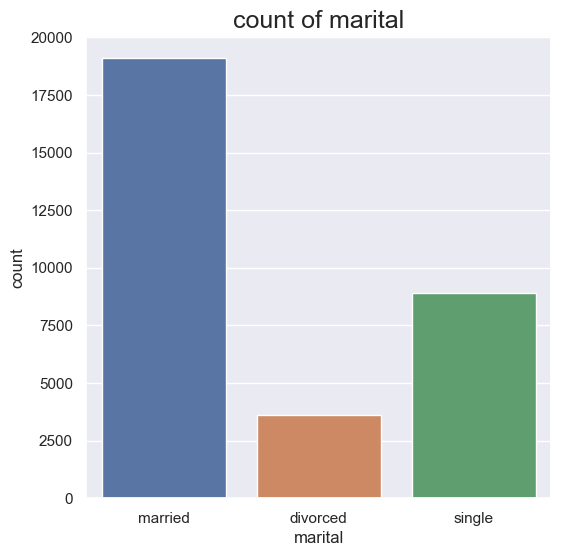

In [131]:
plt.figure(figsize=(6,6))

sns.countplot(x='marital',data=df)
plt.title('count of marital',fontsize=18)
plt.show()

In [ ]:
df.columns

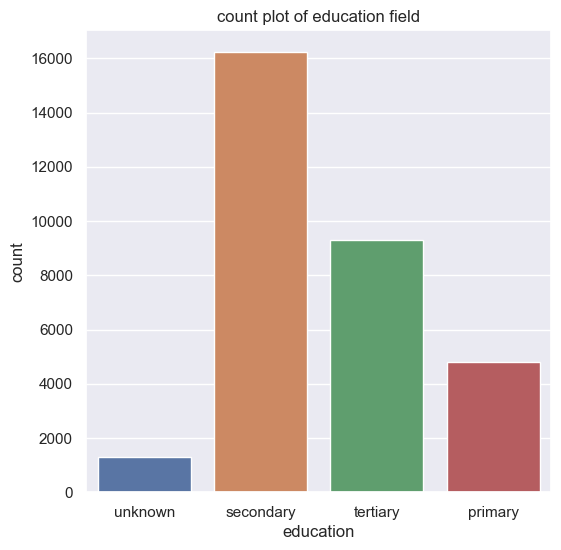

In [158]:
#count plot of education
plt.figure(figsize=(6,6))

sns.countplot(x='education',data=df)
plt.title('count plot of education field')
plt.show()


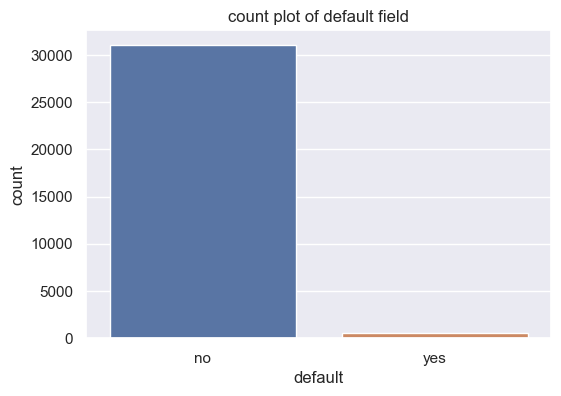

In [159]:
plt.figure(figsize=(6,4))

sns.countplot(x='default',data=df)
plt.title('count plot of default field')
plt.show()


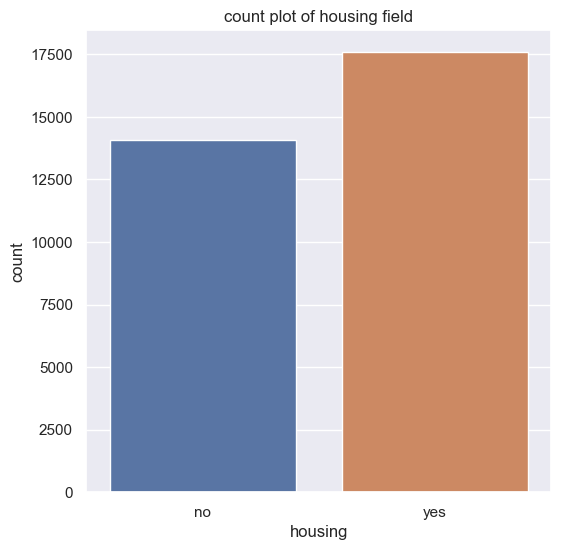

In [160]:
plt.figure(figsize=(6,6))

sns.countplot(x='housing',data=df)
plt.title('count plot of housing field')
plt.show()


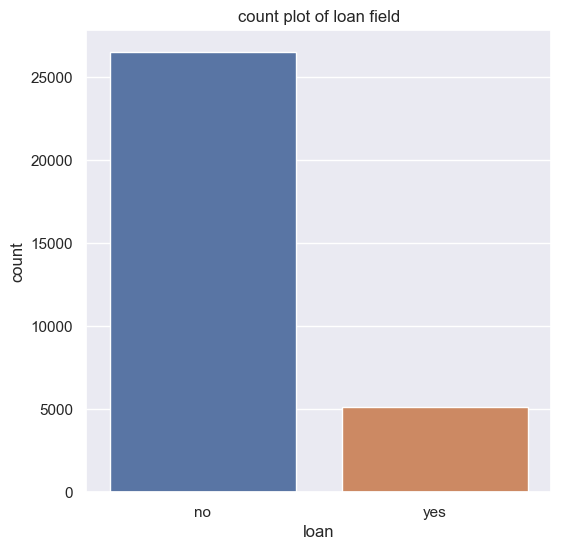

In [161]:
plt.figure(figsize=(6,6))

sns.countplot(x='loan',data=df)
plt.title('count plot of loan field')
plt.show()


# 7.DATA VISUALIZATION USING BARPLOT

In [ ]:
df.columns

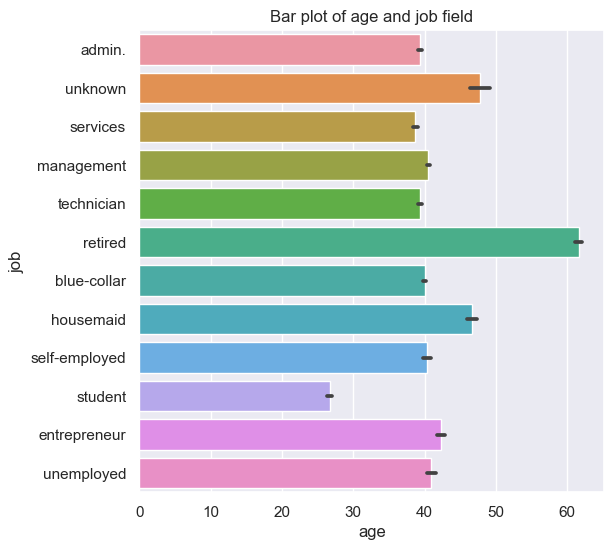

In [162]:
plt.figure(figsize=(6,6))

sns.barplot(x='age',y='job',data=df)
plt.title('Bar plot of age and job field')
plt.show()


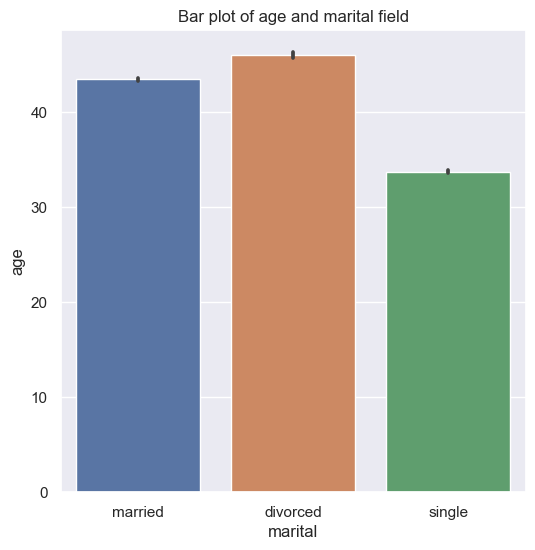

In [163]:
plt.figure(figsize=(6,6))

sns.barplot(y='age',x='marital',data=df)
plt.title('Bar plot of age and marital field')
plt.show()


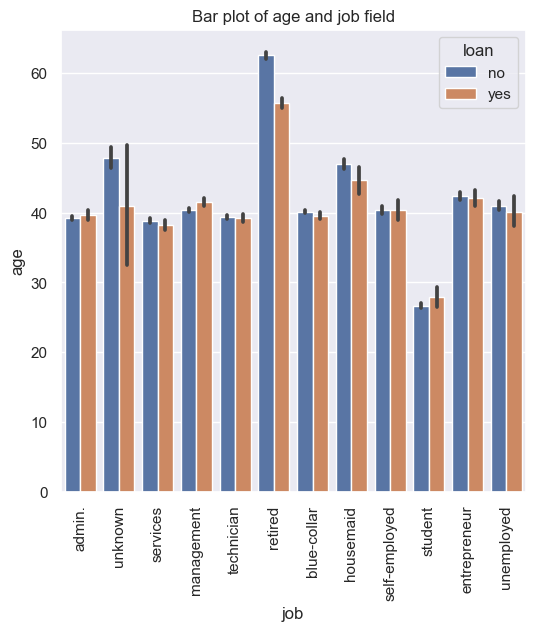

In [164]:
plt.figure(figsize=(6,6))

sns.barplot(x='job',y='age',data=df,hue='loan')
plt.title('Bar plot of age and job field')
plt.xticks(rotation=90)

 
plt.show()


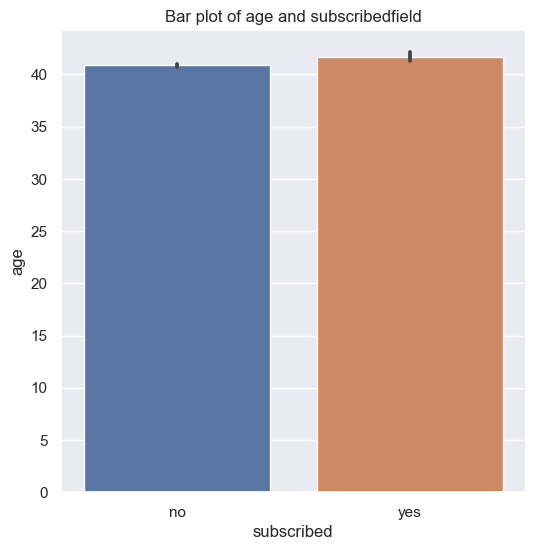

In [165]:
plt.figure(figsize=(6,6))

sns.barplot(x='subscribed',y='age',data=df)
plt.title('Bar plot of age and subscribedfield')
plt.show()

In [169]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

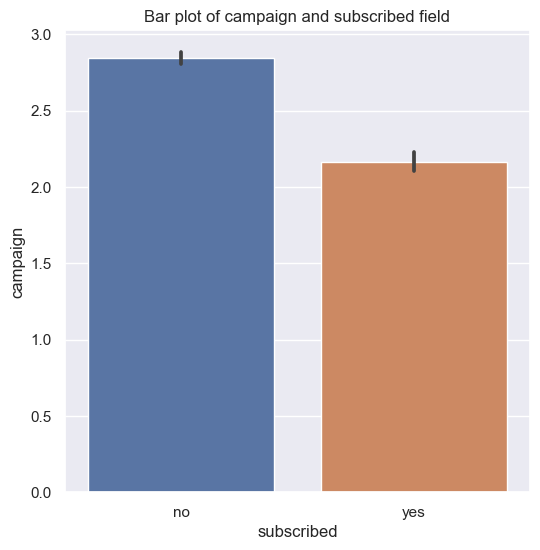

In [172]:
plt.figure(figsize=(6,6))

sns.barplot(x='subscribed',y='campaign',data=df)
plt.title('Bar plot of campaign and subscribed field')
plt.show()
    
    

In [27]:
#copy the data set
df_train=df.copy()

# 8.CHECKING CATEGORICA COLUMNS

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [22]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# 9.ENCODING THE TARGET VARIABLE 

In [28]:
df_train['subscribed']=df_train['subscribed'].map({'yes':1,'no':0})

# 10.ENCODING THE CATEGORICAL COLUMNS USING ORDINAL ENCODING

In [29]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_train.columns:
    if df_train[i].dtype=='object':
        df_train[i]=OE.fit_transform(df_train[i].values.reshape(-1,1))

In [30]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0


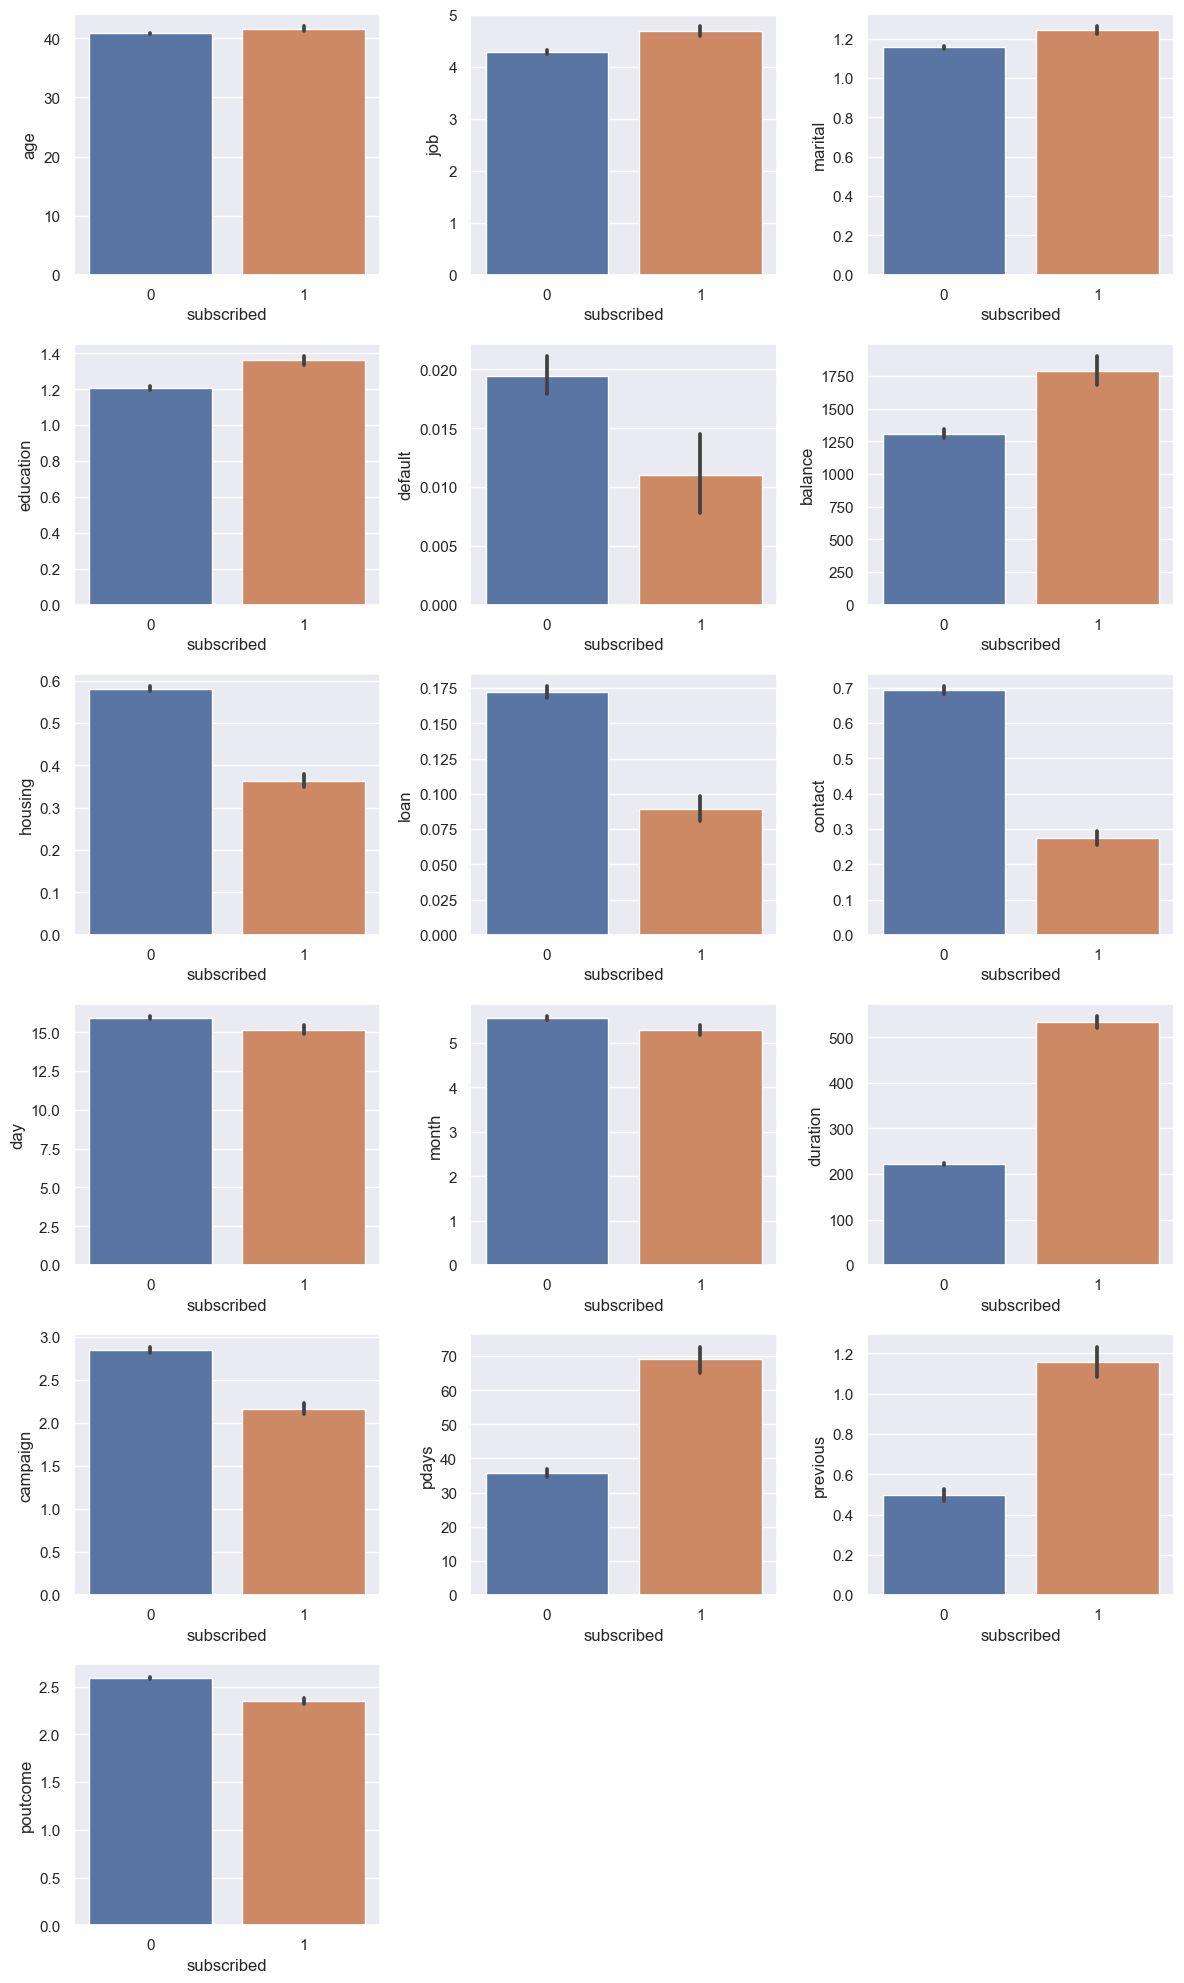

In [157]:
plt.figure(figsize=(12,20))

plotnumber=1
for i in df_train.columns[:-1]:
    if plotnumber<=18:
        plt.subplot(6,3,plotnumber)
        sns.barplot(x='subscribed',y=df_train[i],data=df_train)
        plt.xlabel('subscribed')
    plotnumber+=1
    
plt.tight_layout()
plt.show()

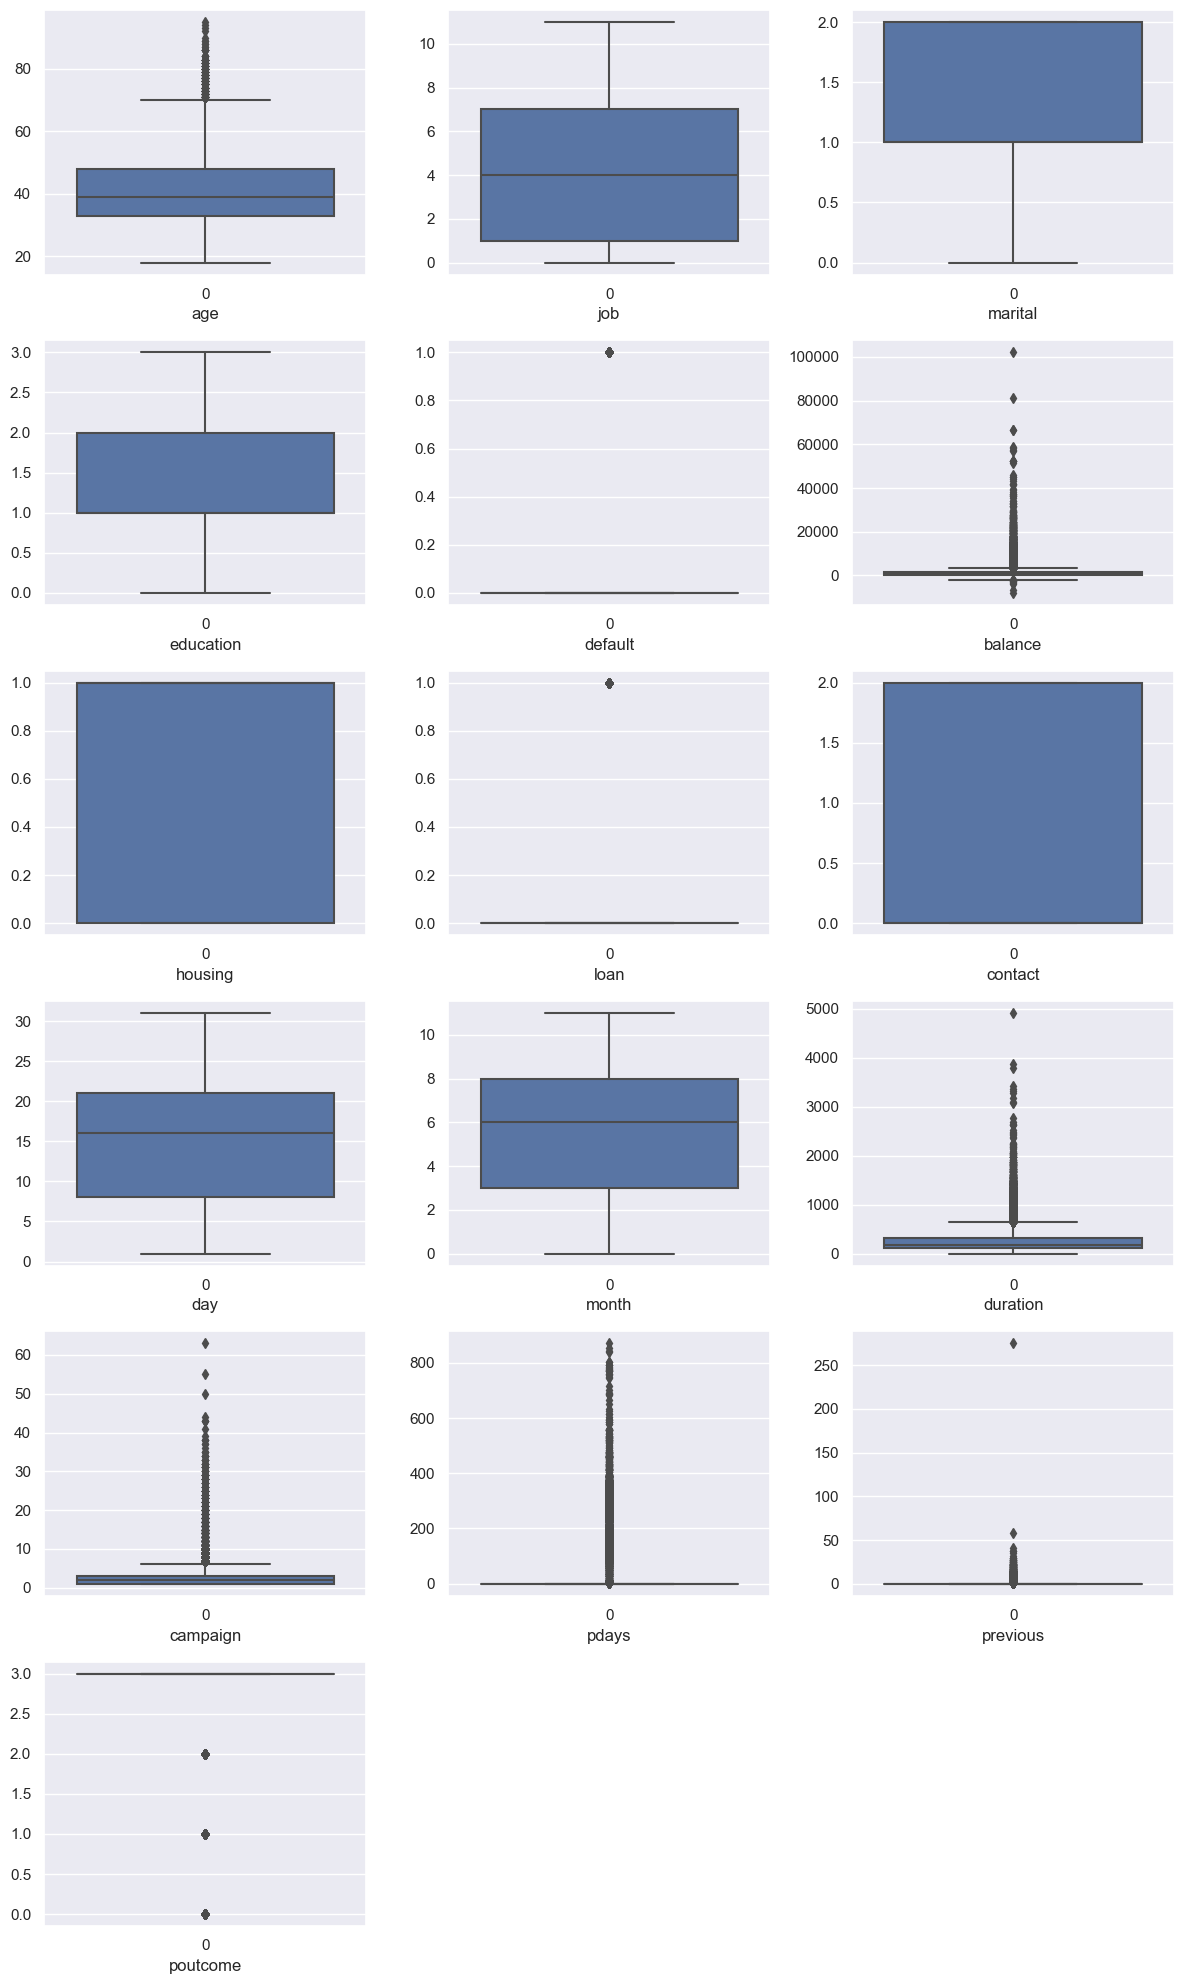

In [156]:
#Checking outliers
plt.figure(figsize=(12,20))

plotnumber=1
for i in df_train.columns[:-1]:
    if plotnumber<=18:
        plt.subplot(6,3,plotnumber)
        sns.boxplot(df_train[i])
        plt.xlabel(i)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

In [31]:
#dropping the id column
df_train=df_train.drop('ID',axis=1)

In [32]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0


# 11.SPLITING THE DATASET INTO X AND Y

In [65]:
x=df_train.drop('subscribed',axis=1)
y=df_train['subscribed']

In [66]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0


In [64]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9094,28,0.0,1.0,1.0,0.0,7707,1.0,0.0,2.0,30,8.0,68,2,-1,0,3.0
12247,54,10.0,2.0,2.0,0.0,252,1.0,0.0,0.0,21,5.0,101,1,-1,0,3.0
29143,46,2.0,1.0,1.0,0.0,583,1.0,0.0,2.0,20,8.0,137,2,-1,0,3.0
19040,39,4.0,0.0,2.0,0.0,4692,1.0,0.0,1.0,19,9.0,214,2,174,2,2.0
11207,38,7.0,1.0,1.0,1.0,-433,1.0,0.0,0.0,21,5.0,111,2,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629,55,3.0,1.0,0.0,0.0,0,0.0,0.0,0.0,13,1.0,139,2,-1,0,3.0
10253,56,1.0,1.0,1.0,0.0,300,0.0,0.0,0.0,20,1.0,184,3,-1,0,3.0
25798,32,1.0,1.0,0.0,0.0,2114,1.0,0.0,1.0,17,0.0,40,1,-1,0,3.0
29309,42,9.0,1.0,1.0,0.0,233,0.0,0.0,0.0,8,0.0,98,1,231,4,0.0


# 12. IMPORTING THE TEST DATASET

In [82]:
df_test=pd.read_csv('termdeposit_test.csv')

### 13.DISPLAY TOP AND LAST 5 ROWS OF DATASET

In [83]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [84]:
df_test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [85]:
#checking null values
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [86]:
#checking total Columns and rows
df_test.shape

(13564, 17)

# 14.ENCODING THE CATEGORICAL COLUMN OF TEST DATASET

In [89]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_test.columns:
    if df_test[i].dtype=='object':
        df_test[i]=OE.fit_transform(df_test[i].values.reshape(-1,1))

In [90]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0


In [91]:
#dropping the id columns 
df_test=df_test.drop('ID',axis=1)

In [92]:
df_test.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0


In [81]:
df_train.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0


# 15.SPLITING THE  TRAIN DATASET

In [70]:
x=df_train.drop('subscribed',axis=1)
y=df['subscribed']

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_tst, y_train, y_tst=train_test_split(x,y, test_size=0.2, random_state=42)

# 16.IMPORTING THE MODELS

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
lr.fit(x_train,y_train)


LogisticRegression()

In [75]:
y_pred1=lr.predict(x_tst)

# 17.CHECKING ACCURACY SCORE

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [77]:
accuracy_score(y_tst,y_pred1)

0.8870458135860979

# 18.CHECKING PREDICTION TEST DATA(termdeposite_test.csv)

In [104]:
#intializing the x_tes with the test dataset
x_test=df_test

In [118]:
#prediction with logisticregression
y_pred2=lr.predict(x_test)

print(y_pred2)

['no' 'no' 'no' ... 'no' 'no' 'no']


# 19.svc

In [105]:

svc=SVC()

svc.fit(x_train,y_train)
y_pred3=svc.predict(x_test)

In [117]:
print(y_pred3)

['no' 'no' 'no' ... 'no' 'no' 'no']


# 20. Rendom Forest Classifier

In [113]:

rfc=RandomForestClassifier()

In [115]:
rfc.fit(x_train,y_train)
y_pred4=rfc.predict(x_test)

In [116]:
print(y_pred4)

['no' 'no' 'no' ... 'no' 'yes' 'no']


# 21.Gradient Boosting Classifier

In [120]:
gbr=GradientBoostingClassifier()


In [121]:
gbr.fit(x_train,y_train)
y_pred5=gbr.predict(x_test)

In [122]:
print(y_pred5)

['no' 'no' 'no' ... 'no' 'yes' 'no']


<Axes: ylabel='count'>

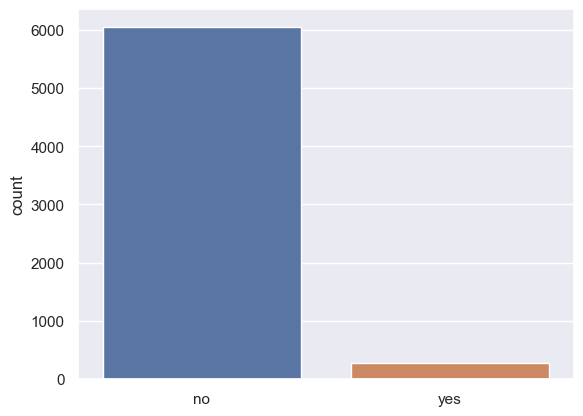

In [126]:

sns.countplot(x=y_pred1)

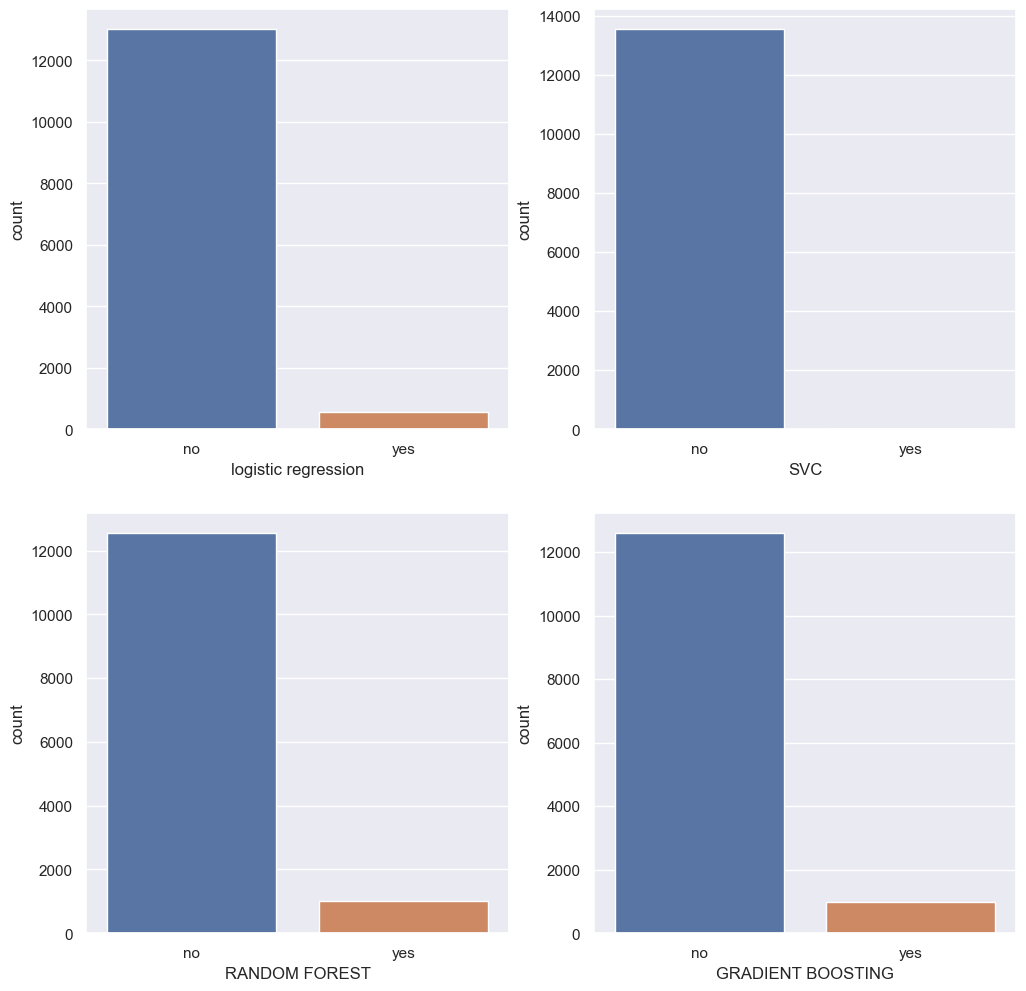

In [127]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.countplot(x=y_pred2)
plt.xlabel('logistic regression')

plt.subplot(2,2,2)
sns.countplot(x=y_pred3)
plt.xlabel('SVC')

plt.subplot(2,2,3)
sns.countplot(x=y_pred4)
plt.xlabel('RANDOM FOREST')

plt.subplot(2,2,4)
sns.countplot(x=y_pred5)
plt.xlabel('GRADIENT BOOSTING')

plt.show()

In [129]:
ds=pd.DataFrame({'LR':y_pred2,'scv':y_pred3,'rfc':y_pred4,'gbc':y_pred5})

In [130]:
ds

,LR,scv,rfc,gbc
0,no,no,no,no
1,no,no,no,no
2,no,no,no,no
3,no,no,no,no
4,no,no,no,no
...,...,...,...,...
13559,no,no,no,no
13560,no,no,no,no
13561,no,no,no,no
13562,no,no,yes,yes
